In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

In [2]:
def load_data(filename):
    with open(f'../outputs/{filename}', 'r') as f:
        data = json.load(f)
    return data

def plot_histogram(data, title, x_label, y_label):
    plt.figure(figsize=(10,6))
    plt.hist(data, bins=30)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def plot_scatter_time_series(data, title, x_label, y_label):
    lists = sorted(data.items())
    x, y = zip(*lists)
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, alpha=0.4)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [7]:
def plot_results():
    # Command line arguments
    tracker_names = [
        'tray_queue_waiting_times',
        'tray_queue_lengths',
        'xray_queue_waiting_times',
        'xray_queue_lengths',
        'bodyscreen_entrance_waiting_times',        
        'bodyscreen_queue_waiting_times',
        'bodyscreen_waiting_area_count',
        'total_system_times',
    ]  

    # Load data from JSON files, generate plots, and print average times
    for name in tracker_names:
        data = load_data(f'{name}.json')
        if name in ['tray_queue_waiting_times', 
                    'xray_queue_waiting_times', 
                    'bodyscreen_entrance_waiting_times', 
                    'bodyscreen_queue_waiting_times', 
                    'total_system_times',
                    'tray_queue_lengths',
                    'xray_queue_lengths']:
            plot_histogram(list(data.values()/60), f'{name} Histogram', 'Time (min)', 'Frequency')
        elif name in ['bodyscreen_waiting_area_count']:
            plot_scatter_time_series(data, f'{name} Scatter Time Series', 'Time', 'Count')
        else:
            print(f'Invalid tracker name: {name}')
            sys.exit(1)

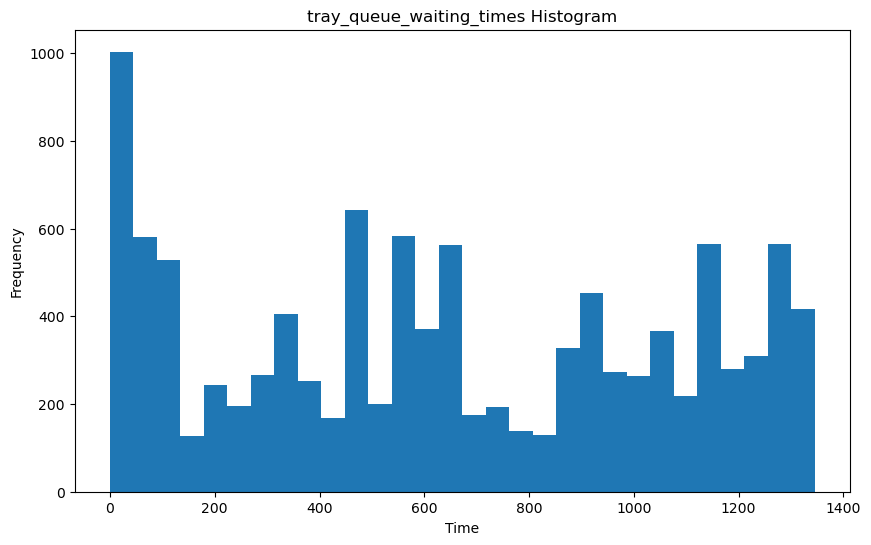

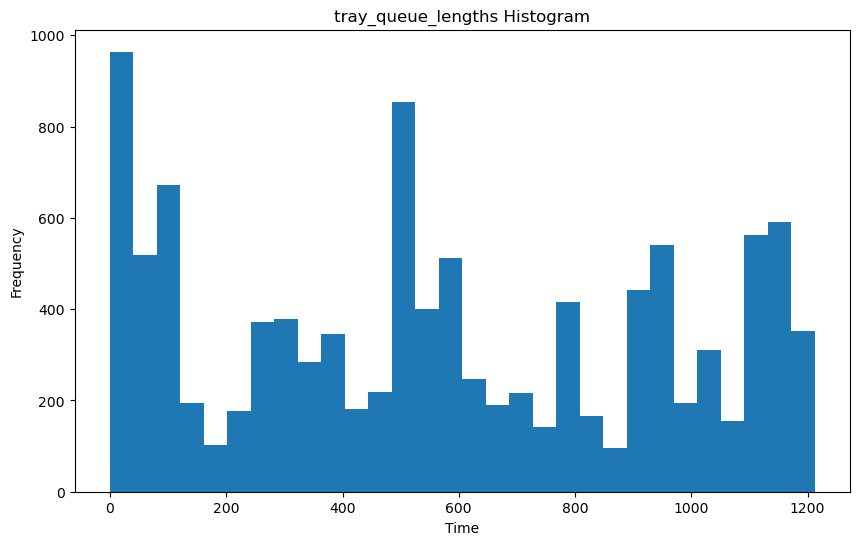

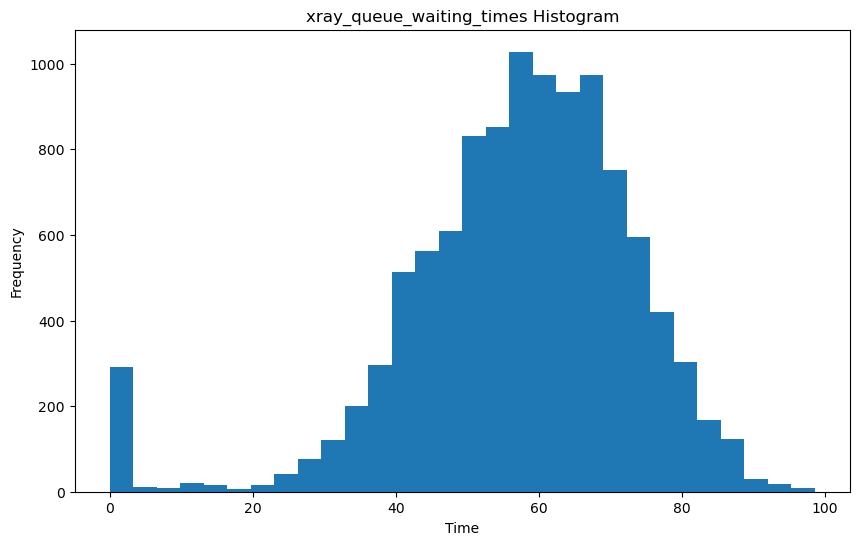

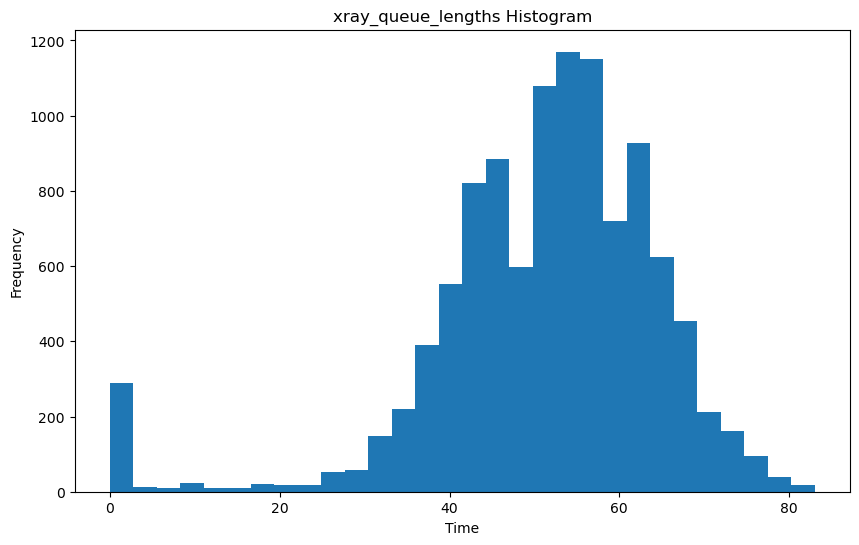

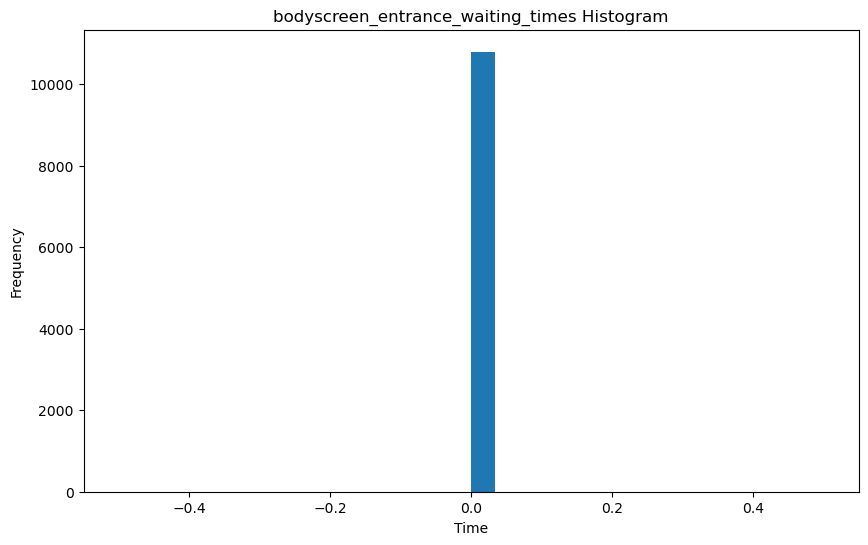

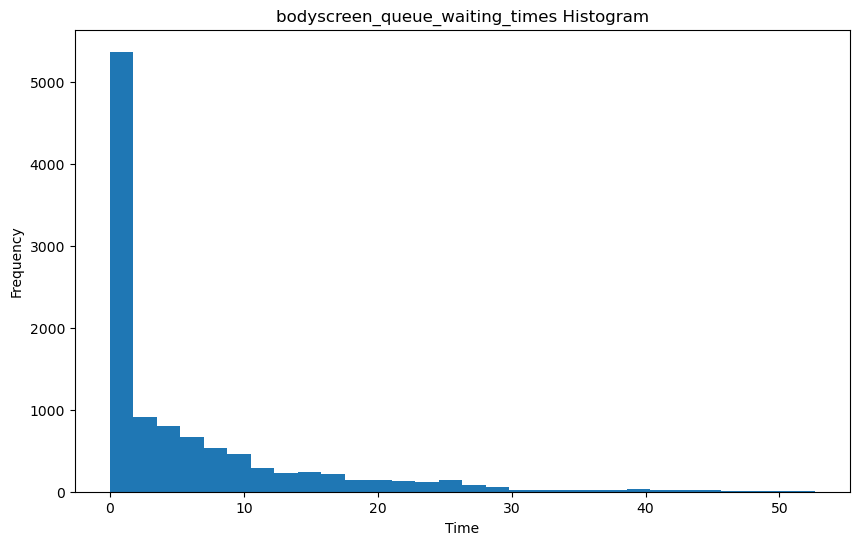

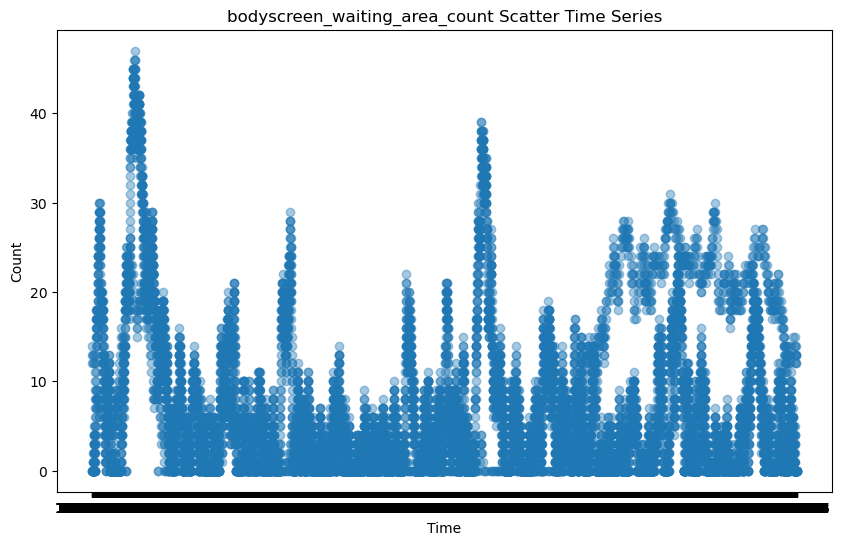

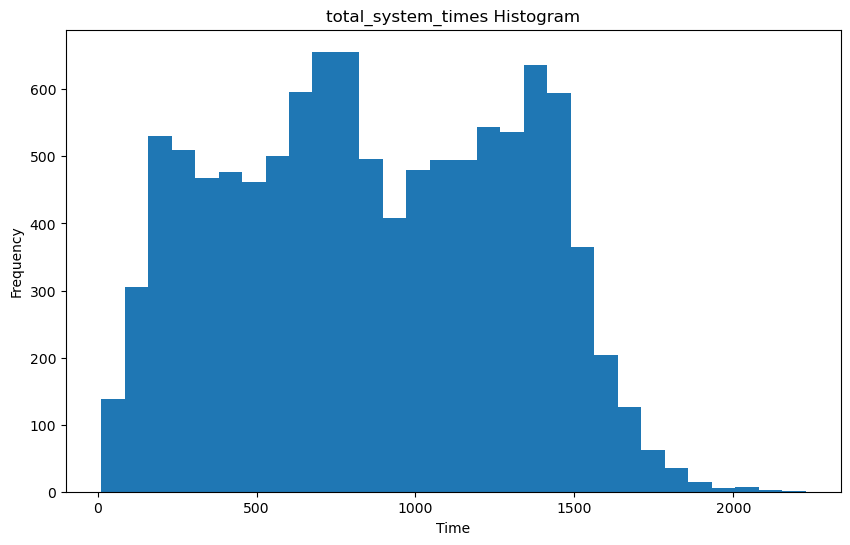

In [6]:
plot_results()